**Ex 2.2.1 Load the file `names/yob1880.txt` into an RDD called `rdd`.  Then evaluate the expression `rdd.first()` to see the first line of the file and `rdd.count()` to count the number of lines in the file**

In [1]:
# Record current path for future use
import os
cwd = os.getcwd()
cwd

'/Users/pat/Work/2015/PythonTraining/4DayTrainingOpenSource'

In [2]:
rdd = sc.textFile("file://" + cwd + "/names/yob1880.txt")
print(rdd.first())
print(rdd.count())

Mary,F,7065
2000


**Ex 2.2.2 Using `sc.textFile()`, load `"names/yob1880.txt"` into an RDD.  Then using `map`, `filter` and `distinct`, create an RDD with all the names that start with the letter `M`**

In [3]:
csvRDD = sc.textFile("file://" + cwd + "/names/yob1880.txt")
print(csvRDD.first())

fieldsRDD = csvRDD.map(lambda line: line.split(','))
print(fieldsRDD.first())

allNamesRDD = fieldsRDD.map(lambda fields: fields[0])
print(allNamesRDD.first())
print(allNamesRDD.count())

allNamesWithMRDD = allNamesRDD.filter(lambda name: name.startswith("M"))
print(allNamesWithMRDD.first())
print(allNamesWithMRDD.count())

distinctNamesWithMRDD = allNamesWithMRDD.distinct()
print(distinctNamesWithMRDD.first())
print(distinctNamesWithMRDD.count())

print(distinctNamesWithMRDD.collect())

Mary,F,7065
[u'Mary', u'F', u'7065']
Mary
2000
Mary
184
Matt
178
[u'Matt', u'Mathias', u'Millie', u'Minor', u'Milford', u'Manly', u'Mima', u'Millard', u'Mellie', u'Minna', u'Manford', u'Michael', u'Mont', u'Margery', u'Mayme', u'Mallie', u'Mahala', u'Marion', u'Moroni', u'Melva', u'Myrta', u'Myrtie', u'Mandy', u'Mart', u'Manda', u'Margarett', u'Mame', u'Moses', u'Mintie', u'Mike', u'Mathilda', u'Mathew', u'Math', u'Mignon', u'Minnie', u'Mattie', u'Mahalia', u'Merida', u'Madora', u'Mildred', u'Maggie', u'Madison', u'Maymie', u'Manson', u'Mollie', u'Magnolia', u'Manuel', u'Mable', u'Mose', u'Merle', u'Mamie', u'Mace', u'Mack', u'Metta', u'Miner', u'Mertie', u'Micheal', u'Merrill', u'Michel', u'Marshall', u'Murray', u'Muriel', u'Malachi', u'Manuela', u'Mittie', u'Minta', u'Murdock', u'Maye', u'Mammie', u'Molly', u'Myron', u'Millicent', u'Mac', u'Mae', u'Mai', u'Mitchell', u'Mariah', u'Mathilde', u'Margaretta', u'Marian', u'Mettie', u'Morris', u'Morgan', u'Mercedes', u'Merritt', u'Minda', 

Here is the same calculation, expressed more compactly:

In [4]:
csvRDD = sc.textFile("file://" + cwd + "/names/yob1880.txt")

distinctNamesWithMRDD = (
    csvRDD
    .map(lambda line: line.split(',')[0])
    .filter(lambda name: name.startswith("M"))
    .distinct()
)

print(distinctNamesWithMRDD.collect())

[u'Matt', u'Mathias', u'Millie', u'Minor', u'Milford', u'Manly', u'Mima', u'Millard', u'Mellie', u'Minna', u'Manford', u'Michael', u'Mont', u'Margery', u'Mayme', u'Mallie', u'Mahala', u'Marion', u'Moroni', u'Melva', u'Myrta', u'Myrtie', u'Mandy', u'Mart', u'Manda', u'Margarett', u'Mame', u'Moses', u'Mintie', u'Mike', u'Mathilda', u'Mathew', u'Math', u'Mignon', u'Minnie', u'Mattie', u'Mahalia', u'Merida', u'Madora', u'Mildred', u'Maggie', u'Madison', u'Maymie', u'Manson', u'Mollie', u'Magnolia', u'Manuel', u'Mable', u'Mose', u'Merle', u'Mamie', u'Mace', u'Mack', u'Metta', u'Miner', u'Mertie', u'Micheal', u'Merrill', u'Michel', u'Marshall', u'Murray', u'Muriel', u'Malachi', u'Manuela', u'Mittie', u'Minta', u'Murdock', u'Maye', u'Mammie', u'Molly', u'Myron', u'Millicent', u'Mac', u'Mae', u'Mai', u'Mitchell', u'Mariah', u'Mathilde', u'Margaretta', u'Marian', u'Mettie', u'Morris', u'Morgan', u'Mercedes', u'Merritt', u'Minda', u'Melville', u'Major', u'Malcolm', u'May', u'Margarette', u'Mabel

**Ex 2.2.3 Use `reduce()` to calculate 10! in Spark**

In [5]:
rdd = sc.parallelize(range(1, 10+1))
rdd.reduce(lambda x, y: x * y)

3628800

**Ex 2.2.4  Use `reduce()` to create a single string of all the names starting with M from Ex 2.2.2, with names separated by commas**

In [6]:
# Notice that the order of the names is arbitrary!
distinctNamesWithMRDD.reduce(lambda x, y: x + ", " + y)

u'Matt, Mathias, Millie, Minor, Milford, Manly, Mima, Millard, Mellie, Minna, Manford, Michael, Mont, Margery, Mayme, Mallie, Mahala, Marion, Moroni, Melva, Myrta, Myrtie, Mandy, Mart, Manda, Margarett, Mame, Moses, Mintie, Mike, Mathilda, Mathew, Math, Mignon, Minnie, Mattie, Mahalia, Merida, Madora, Mildred, Maggie, Madison, Maymie, Manson, Mollie, Magnolia, Manuel, Mable, Mose, Merle, Mamie, Mace, Mack, Metta, Miner, Mertie, Micheal, Merrill, Michel, Marshall, Murray, Muriel, Malachi, Manuela, Mittie, Minta, Murdock, Maye, Mammie, Molly, Myron, Millicent, Mac, Mae, Mai, Mitchell, Mariah, Mathilde, Margaretta, Marian, Mettie, Morris, Morgan, Mercedes, Merritt, Minda, Melville, Major, Malcolm, May, Margarette, Mabel, Manley, Monroe, Marie, Meda, Martin, Marcia, Myrtle, Melinda, Manervia, Matthias, Mortimer, Mark, Malissa, Marcus, Margret, Madeline, Miguel, Melvin, Maryann, Martina, Martha, Mary, Miller, Marquis, Minerva, Mat, Merton, Margaret, Maxwell, Marvin, Max, Malcom, Miriam, Men

**(!) Ex 2.2.5 Last week, we talked about Newton's algorithm for finding the square root of $n$ to a given precision $eps$.  Briefly:**
* **Make a guess $x = 1.0$.**
* **Either $x$ or $n / x$ are two big.  So improve the guess by using the average of these two numbers, i.e., $(x + n/x)/2$.**
* **Keep improving the guess until $x*x$ and $n$ differ by less than $eps$.**

**Write a Spark version of Newton's algorithm that calculates the square roots of all the numbers in an RDD.**  
_Hint_: If your RDD of $n$'s is called `ns`, it might help to initially transform it to an RDD of ($n$, $x$) tuples, as follows:
```
nsAndGuesses = ns.map(lambda n: (n, 1.0))
```

In [7]:
ns = sc.parallelize([2.0, 5.0, 42.0])
eps = 1e-5

nsAndGuesses = ns.map(lambda n: (n, 1.0))

while nsAndGuesses.filter(lambda (n, x): abs(x*x - n) > eps).count() > 0:
    nsAndGuesses = nsAndGuesses.map(lambda (n, x): (n, (x + n/x) / 2.0))
    nsAndGuesses.cache()
    
nsAndGuesses.collect()

[(2.0, 1.414213562373095), (5.0, 2.23606797749979), (42.0, 6.480740727643494)]

**(!) Ex 2.2.6  Calculate the total number of births in the US with any given name, from 1950 to 2000 (inclusive)**

In [8]:
# First, lets load up all the files into a single RDD
fileRDDs = []
for year in range(1950,2000+1):
    fileRDDs.append(sc.textFile("file://" + cwd +
                                "/names/yob{0}.txt".format(year)))
allCSVLinesRDD = sc.union(fileRDDs)
    
# Remember what the format was like
print(allCSVLinesRDD.first())

Linda,F,80431


In [9]:
# Now do the calculation
countsRDD = (
    allCSVLinesRDD
    .map(lambda line: line.split(','))
    .map(lambda fields: (fields[0], int(fields[2])))
    .reduceByKey(lambda x, y: x + y)
    .sortBy(lambda (name, count): count, ascending=False)
)
result = countsRDD.take(20)

# This is just nicer formatting
for name, count in result:
    print("{:<30}{:>7}".format(name, count))

Michael                       3554246
David                         2616412
James                         2604117
John                          2504730
Robert                        2429312
William                       1789899
Christopher                   1739768
Joseph                        1416815
Jennifer                      1392133
Daniel                        1376737
Richard                       1373228
Thomas                        1309885
Mary                          1288907
Matthew                       1263860
Mark                          1232699
Steven                        1122420
Brian                         1059917
Kevin                         1014177
Charles                       1010472
Anthony                        968043


**Ex 2.3.1 Earlier, we had set up a Pandas DataFrame of GDP per capita for Belgium and the Netherlands in the years 1913, 1950 and 2003 as follows:**
```
data = {
    'country': ['BE', 'BE', 'BE', 'NL', 'NL', 'NL'],
    'year': [1913, 1950, 2003, 1913, 1950, 2003],
    'gdp_per_capita': [4220, 5462, 21205, 4049, 5996, 21480]
}
frame = DataFrame(data)
```
**Expose an equivalent table in Spark SQL.  What has been the average GDP per capita of these two countries in the years concerned?**

In [10]:
# First, load SparkSQL in this context
from pyspark import SQLContext, Row
sqlCtx = SQLContext(sc)

In [11]:
# Create dataset as SchemaRDD and expose it as a table
rdd = sc.parallelize([
        Row(country='BE', year=1913, gdp_per_capita=4220),
        Row(country='BE', year=1950, gdp_per_capita=5462),
        Row(country='BE', year=2003, gdp_per_capita=21205),
        Row(country='NL', year=1913, gdp_per_capita=4049),
        Row(country='NL', year=1950, gdp_per_capita=5996),
        Row(country='NL', year=2003, gdp_per_capita=21480),
    ])
schemaRDD = sqlCtx.inferSchema(rdd)
schemaRDD.registerTempTable("be_nl_gdps")

In [12]:
sqlCtx.sql("SELECT year, avg(gdp_per_capita) "
           "FROM be_nl_gdps GROUP BY year ORDER BY year ASC").collect()

[Row(year=1913, c1=4134.5),
 Row(year=1950, c1=5729.0),
 Row(year=2003, c1=21342.5)]

**Ex 2.3.2 Using queries to extract the Belgian and Dutch datasets, then joining by year, calculate the percent difference in GDP per capita between BE and NL in all years concerned.**

In [13]:
be_gdps = sqlCtx.sql("SELECT year, gdp_per_capita FROM be_nl_gdps WHERE country='BE'")
be_gdps.registerTempTable("be_gdps")

In [14]:
nl_gdps = sqlCtx.sql("SELECT year, gdp_per_capita FROM be_nl_gdps WHERE country='NL'")
nl_gdps.registerTempTable("nl_gdps")

In [15]:
# Let's get both GDP-per-capitas together
joinedRDD = sqlCtx.sql("SELECT "
                       "    be.year, "
                       "    be.gdp_per_capita as be_gdp, "
                       "    nl.gdp_per_capita as nl_gdp "
                       "FROM be_gdps be JOIN nl_gdps nl ON be.year = nl.year "
                       "ORDER BY year ASC")
joinedRDD.collect()

[Row(year=1913, be_gdp=4220, nl_gdp=4049),
 Row(year=1950, be_gdp=5462, nl_gdp=5996),
 Row(year=2003, be_gdp=21205, nl_gdp=21480)]

In [16]:
# Do what we actually wanted
sqlCtx.sql("SELECT "
           "    be.year, "
           "    (nl.gdp_per_capita / be.gdp_per_capita - 1) * 100 as nl_percent_bigger "
           "FROM be_gdps be JOIN nl_gdps nl ON be.year = nl.year "
           "ORDER BY year ASC").collect()

[Row(year=1913, nl_percent_bigger=-4.052132701421796),
 Row(year=1950, nl_percent_bigger=9.77663859392164),
 Row(year=2003, nl_percent_bigger=1.2968639471822696)]

**Ex 2.3.3  Using `sc.textFile`, `union` and `map`, expose the `names` dataset as a SchemaRDD with columns `year`, `name`, `sex` and `births`.**

We can adapt some of what we did before, but do it in a Spark SQL context.

In [17]:
def load_one_file(year):
    filename = ("file:///Users/pat/Work/2015/PythonTraining/" +
                "4DayTraining/names/yob{0}.txt").format(year)
    csvRDD = sc.textFile(filename).map(lambda line: line.split(","))
    schemaRDD = csvRDD.map(lambda fields: Row(year=year, name=fields[0], sex=fields[1], births=int(fields[2])))
    return schemaRDD

def load_all_files():
    allYearsRDD = sc.union([load_one_file(year) for year in range(1880, 2014+1)])
    return sqlCtx.inferSchema(allYearsRDD)

# Load files and expose as a SQL table
schemaRDD = load_all_files()
schemaRDD.cache()  # Don't reload again and again
schemaRDD.registerTempTable("names")

# Print first record to double-check
print(schemaRDD.first())

Row(births=7065, name=u'Mary', sex=u'F', year=1880)


**Ex 2.3.4  How many births took place in the US from 1939 to 1945?**  
_Note:_ the answer isn't quite accurate, because the underlying `names` dataset only includes names for which at least 5 births took place in any given year.  But let's ignore this detail.

In [18]:
# We'll show the intermediate steps so you can see what's happening
result = sqlCtx.sql("SELECT SUM(births) as total FROM names WHERE year BETWEEN 1939 AND 1945")
result

MapPartitionsRDD[670] at mapPartitions at SerDeUtil.scala:143

In [19]:
result.collect()

[Row(total=17836691)]

Just to be nice, we can extract the total as an integer for later use:

In [20]:
total = result.first().total
print(total)

17836691


**Ex 2.3.5 Make a plot of the number of babies called `"Mary"` (either gender) born each year from 1880 to 2014**

Let's first extract the data with a Spark SQL query, then build the plot separately.

In [21]:
result = sqlCtx.sql(
    "SELECT year, SUM(births) as births "
    "FROM names "
    "WHERE name='Mary' "
    "GROUP BY year "
    "ORDER BY year ASC"
)
result

MapPartitionsRDD[696] at mapPartitions at SerDeUtil.scala:143

Notice that the query still hasn't executed.  Let's transform it to something more useful than an RDD of `Row`s, then collect the results:

In [22]:
counts = result.map(lambda row: (row.year, row.births)).collect()
counts

[(1880, 7092),
 (1881, 6948),
 (1882, 8178),
 (1883, 8044),
 (1884, 9253),
 (1885, 9166),
 (1886, 9922),
 (1887, 9935),
 (1888, 11804),
 (1889, 11689),
 (1890, 12113),
 (1891, 11742),
 (1892, 13223),
 (1893, 12839),
 (1894, 13199),
 (1895, 13493),
 (1896, 13868),
 (1897, 13476),
 (1898, 14456),
 (1899, 13222),
 (1900, 16782),
 (1901, 13194),
 (1902, 14542),
 (1903, 14338),
 (1904, 15020),
 (1905, 16135),
 (1906, 16446),
 (1907, 17650),
 (1908, 18745),
 (1909, 19339),
 (1910, 22947),
 (1911, 24488),
 (1912, 32421),
 (1913, 36767),
 (1914, 45471),
 (1915, 58346),
 (1916, 61601),
 (1917, 64439),
 (1918, 67539),
 (1919, 65995),
 (1920, 71171),
 (1921, 74172),
 (1922, 72357),
 (1923, 71837),
 (1924, 73750),
 (1925, 70862),
 (1926, 68095),
 (1927, 70914),
 (1928, 67160),
 (1929, 63835),
 (1930, 64474),
 (1931, 60619),
 (1932, 60201),
 (1933, 55809),
 (1934, 57221),
 (1935, 55343),
 (1936, 54656),
 (1937, 55928),
 (1938, 56495),
 (1939, 55172),
 (1940, 56498),
 (1941, 58346),
 (1942, 63514),


Now we make the plot:

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt

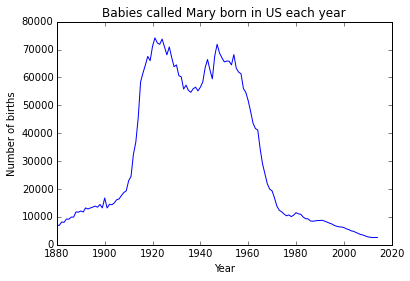

In [24]:
years = [year for (year, _) in counts]
births = [births for (_, births) in counts]
plt.plot(years, births)
plt.xlabel('Year')
plt.ylabel('Number of births')
plt.title('Babies called Mary born in US each year')

**Ex 2.3.6 Make a plot of the number of boys and girls born each year from 1880 to 2014**

In [25]:
# You can see how this goes
result = (sqlCtx.sql(
          """
          SELECT
             year,
             SUM(CASE sex WHEN 'F' THEN births ELSE 0 END) as girls,
             SUM(CASE sex WHEN 'M' THEN births ELSE 0 END) as boys
          FROM names
          GROUP BY year
          ORDER BY year ASC
          """)
          .map(lambda row: (row.year, row.girls, row.boys))
         ).collect()

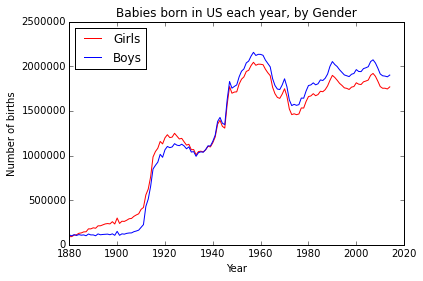

In [26]:
years = [year for (year, _, _) in result]
girls = [girls for (_, girls, _) in result]
boys = [boys for (_, _, boys) in result]
plt.plot(years, girls, 'r-', label='Girls')
plt.plot(years, boys, 'b-', label='Boys')
plt.xlabel('Year')
plt.ylabel('Number of births')
plt.title('Babies born in US each year, by Gender')
plt.legend(loc='upper left')

**(!) Ex 2.3.7  Make a plot of the share of births represented by the top 1000 names each year**

We can use Spark SQL to aggregate over boys and girls, but we need to drop to normal Spark core to get the top 1000 names.

In [27]:
yearNameBirthsRDD = (
    sqlCtx
    .sql("SELECT year, name, SUM(births) as births FROM names GROUP BY year, name")
    .map(lambda row: (row.year, (row.name, row.births)))
)

In [28]:
# Now we'll group by year and calculate the fraction of births represented by the top 1000 names in Python
def top1000_fraction(namesAndBirths):
    # namesAndBirths will be an unsorted list of the form [('Mary', 10), ('John', 500), ...]
    sortedNamesAndBirths = sorted(namesAndBirths, key=lambda (name, births): -births)
    
    # Add up all births first
    allBirths = sum([births for (_, births) in sortedNamesAndBirths])
    
    # Add up just the first 1000
    top1000Births = sum([births for (_, births) in sortedNamesAndBirths[:1000]])
    
    return float(top1000Births) / float(allBirths)

top1000FractionRDD = (
    yearNameBirthsRDD
    .groupByKey()
    .mapValues(top1000_fraction)
)

In [29]:
# Compute it
result = sorted(top1000FractionRDD.collect())  # sort by year
result[:10]

[(1880, 0.9672281670008537),
 (1881, 0.968889304044131),
 (1882, 0.9651527051792469),
 (1883, 0.9658861488822309),
 (1884, 0.961374642148628),
 (1885, 0.9613045193166013),
 (1886, 0.9603045601776601),
 (1887, 0.9594819641384663),
 (1888, 0.9560638439962602),
 (1889, 0.9569129607198478)]

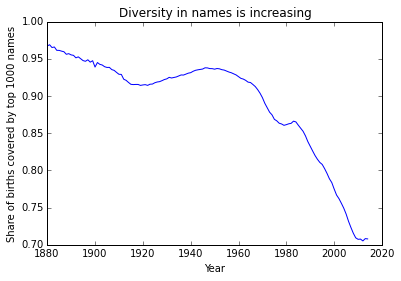

In [30]:
years = [year for (year, _) in result]
shareOfTop1000 = [shareOfTop1000 for (_, shareOfTop1000) in result]
plt.plot(years, shareOfTop1000)
plt.xlabel('Year')
plt.ylabel('Share of births covered by top 1000 names')
plt.title('Diversity in names is increasing')

**Ex 2.4.1: What's the equation of the line of best fit?**

$$
y = 2.91 x - 1.41.
$$

Compare this to the underlying data:
$$
y = 3 x - 2.
$$

**Ex 2.4.2: What's the predicted value of `y` for `x = 2.5`?**

In [31]:
# Set up everything in this notebook

# MatplotLib and NumPy are still useful when working with MLLib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

# Optional: importing this package makes the default plot settings nicer
import seaborn as sns; sns.set()

from pyspark.mllib.regression import LabeledPoint

def linear_data_sample(N=4000, rseed=0, m=3, b=-2):
    """Sample N points on the line y = m*x + b + err, where err is normally distributed"""
    rng = np.random.RandomState(rseed)

    x = 10 * rng.rand(N)
    y = m * x + b + 1.5*rng.randn(N)

    return sc.parallelize([LabeledPoint(yy, [xx]) for xx, yy in zip(x,y)])

pointsRDD = linear_data_sample()

from pyspark.mllib.regression import LinearRegressionWithSGD
model = LinearRegressionWithSGD.train(
    pointsRDD, iterations=300, intercept=True, step=0.1
)
model

(weights=[2.91546762871], intercept=-1.4125729076658198)

In [32]:
model.predict([2.5])

5.8760961641159257

Note that we have to give `predict` a feature vector, even if it has only one feature.

**Ex 2.4.3  What are the weights of the model if you use 500 iterations?**

In [33]:
model = LinearRegressionWithSGD.train(
    pointsRDD, iterations=500, intercept=True, step=0.1
)
model

(weights=[2.95456391586], intercept=-1.6720204222619621)

Only a bit better...

**Ex 2.4.4 How would you add regularisation?  Refit the model with an L2 regularization parameter of 0.1.  Is the model at 300 iterations closer to the ground truth?**

IPython's documentation is your friend.  Use `LinearRegressionWithSGD.train?` to find out about regularisation options.

In [34]:
model = LinearRegressionWithSGD.train(
    pointsRDD, iterations=300, intercept=True, step=0.1,
    regType='l2', regParam=0.01
)
model

(weights=[2.91235820246], intercept=-1.394566118727622)

**Ex 2.4.5 One objective way of saying whether a model is "better" or "worse" than another is to score the model against some test data.**
1. **Build a function to calculate the average squared distance between model and reality against an RDD of LabeledPoints**
2. **Split the data into 80% training and 20% test data (_Hint_: every RDD in Spark can be split randomly).  Now evaluate the improvement in the unregularized model between 100, 200 and 300 iterations**

In [35]:
from math import sqrt
def score_model(model, dataRDD):
    # .mean() is a convenience function in Spark for RDDs of numbers
    return sqrt(dataRDD.map(lambda pt:
                (model.predict(pt.features) - pt.label)**2).mean())

# Try it with the full dataset, no regularization
model = LinearRegressionWithSGD.train(
    pointsRDD, iterations=300, intercept=True, step=0.1
)
score_model(model, pointsRDD)

1.5324518140919192

Now we do the 80-20 split.  Here, Spark's built-in `randomSplit` is handy:

In [36]:
trainingPointsRDD, testingPointsRDD = \
    pointsRDD.randomSplit([0.8, 0.2], seed=0)
print(pointsRDD.count())
print(testingPointsRDD.count())
print(trainingPointsRDD.count())

4000
818
3182


In [37]:
for iters in (100, 200, 300):
    model = LinearRegressionWithSGD.train(trainingPointsRDD, iterations=iters, intercept=True, step=0.1)
    score = score_model(model, testingPointsRDD)
    print("For {0} iterations, the score is {1}".format(iters, score))

For 100 iterations, the score is 1.62598183646
For 200 iterations, the score is 1.54548647967
For 300 iterations, the score is 1.5159074826


As expected, the score improves with more iterations

**Ex 2.4.6  As in the `scikit-learn` example, we've cheated a bit by using all our data for the model, so that the SVM classifier looks perfect.  Let's do this better:**
1. **Split the original data into 60% training and 40% test**
2. **Fit the SVM model to the training data and calculate the model accuracy on the test data.**

In [38]:
# Let's bring all the packages in
from pyspark.mllib.classification import SVMWithSGD
from pyspark.mllib.feature import Vectors
from pyspark.mllib.regression import LabeledPoint

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn import datasets, linear_model

# Optional: importing this package makes the default plot settings nicer
import seaborn as sns; sns.set()

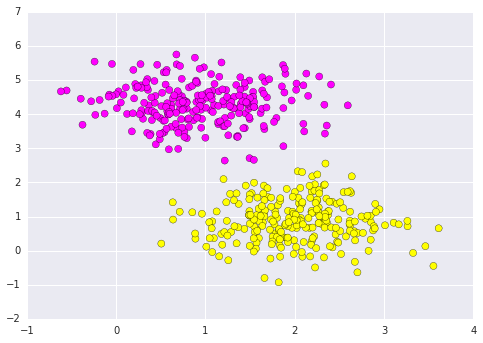

In [39]:
# SVMs
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=500, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');

In [40]:
pointsRDD = sc.parallelize([
        LabeledPoint(yy, [XX0, XX1]) for XX0, XX1, yy in zip(X[:, 0], X[:, 1], y)
    ])
pointsRDD.take(5)

[LabeledPoint(0.0, [0.618481655476,4.27224694969]),
 LabeledPoint(1.0, [2.16562281804,0.666369803713]),
 LabeledPoint(0.0, [0.736600660989,4.52582086016]),
 LabeledPoint(0.0, [2.0159027907,4.71448799156]),
 LabeledPoint(1.0, [2.63168356051,1.69510136786])]

In [41]:
# 60-40 split
trainingRDD, testRDD = pointsRDD.randomSplit([0.6, 0.4])
print(pointsRDD.count())
print(trainingRDD.count())
print(testRDD.count())

500
292
208


In [42]:
# Train on the training data
model = SVMWithSGD.train(trainingRDD, iterations=100, intercept=True)
model

(weights=[1.09142917674,-1.18879602893], intercept=1.236062997799997)

In [43]:
# Evaluate on the testing data
evalRDD = testRDD.map(lambda pt: (model.predict(pt.features), pt.label))
numCorrect = evalRDD.map(lambda (pred, real): pred == real).sum()
accuracy = numCorrect / float(testRDD.count())
print(accuracy)

1.0


Still pretty good!  Let's visualize the decision boundary:

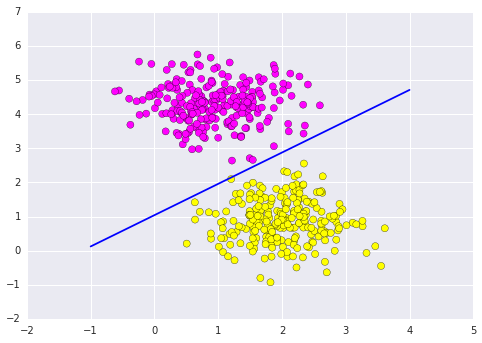

In [44]:
xlinspace = np.linspace(-1.0, 4.0, 50)
ydecision = -(model.weights[0] * xlinspace + model.intercept) / model.weights[1]

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');
plt.plot(xlinspace, ydecision, 'b-')

**Ex 2.4.7 Repeat the exercise, but with clusters that are more spread out (`cluster_std = 1.5` instead of `cluster_std = 0.6`)**

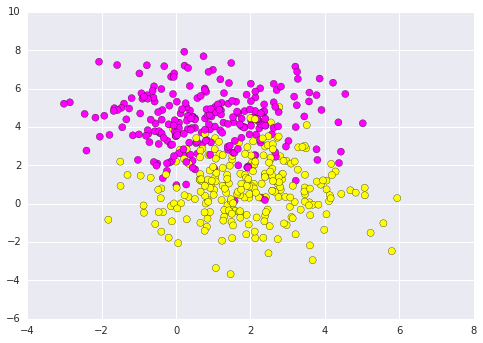

In [45]:
# SVMs
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=500, centers=2,
                  random_state=0, cluster_std=1.50)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');

In [46]:
pointsRDD = sc.parallelize([
        LabeledPoint(yy, [XX0, XX1]) for XX0, XX1, yy in zip(X[:, 0], X[:, 1], y)
    ])

# 60-40 split
trainingRDD, testRDD = pointsRDD.randomSplit([0.6, 0.4])
print(pointsRDD.count())
print(trainingRDD.count())
print(testRDD.count())

500
301
199


In [47]:
# Train on the training data
model = SVMWithSGD.train(trainingRDD, iterations=100, intercept=True)
model

(weights=[0.416200361095,-0.80170986086], intercept=1.2881876499075247)

In [48]:
# Evaluate on the testing data
evalRDD = testRDD.map(lambda pt: (model.predict(pt.features), pt.label))
numCorrect = evalRDD.map(lambda (pred, real): pred == real).sum()
accuracy = numCorrect / float(testRDD.count())
print(accuracy)

0.844221105528


You can see from the plot already that the data aren't perfectly separable, so we'll never get 100% accuracy in this example.  Still, SVM does pretty well given the raw data.

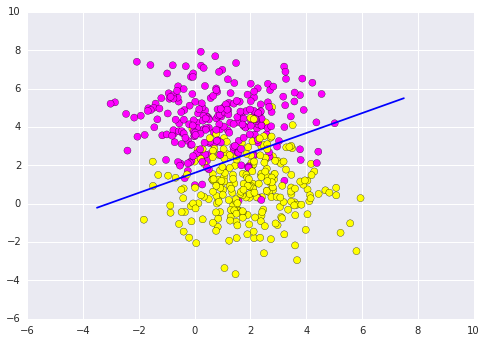

In [49]:
# Visualize decision boundary
xlinspace = np.linspace(-3.5, 7.5, 50)
ydecision = -(model.weights[0] * xlinspace + model.intercept) / model.weights[1]

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');
plt.plot(xlinspace, ydecision, 'b-')